In [11]:
import pandas as pd

# Load the dataset
data = pd.read_csv('stroke_data.csv')
data = data.drop(columns=['id'])
# Display the first 5 rows
print(data.head())

# Basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())


   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column           

In [12]:
# Fill missing values in the 'bmi' column with the mean
data['bmi'].fillna(data['bmi'].mean(), inplace=True)


C:\Users\akell\AppData\Local\Temp\ipykernel_24392\2943686359.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace=True)


In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'
encoder = LabelEncoder()
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    data[col] = encoder.fit_transform(data[col])


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(data[['age', 'avg_glucose_level', 'bmi']])


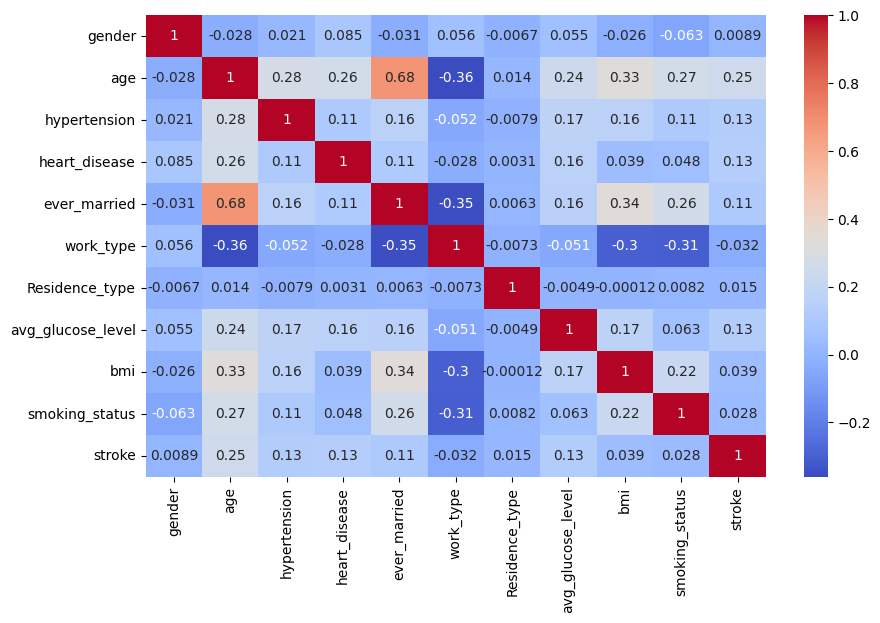

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


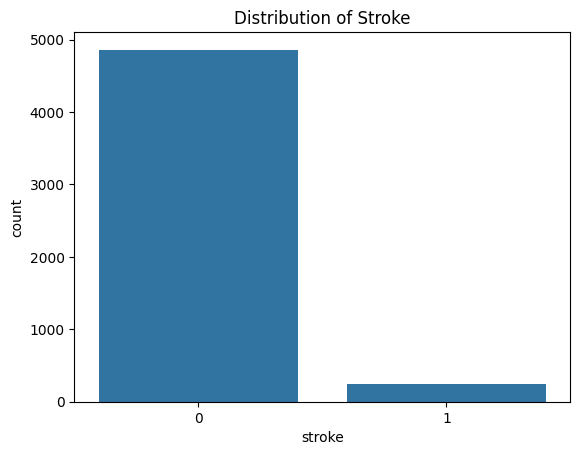

In [16]:
sns.countplot(x='stroke', data=data)
plt.title('Distribution of Stroke')
plt.show()


In [17]:
X = data.drop('stroke', axis=1)
y = data['stroke']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.949119373776908
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



In [19]:
import joblib

# Save the model to a file
joblib.dump(model, 'stroke_prediction_model.pkl')


['stroke_prediction_model.pkl']